# **Credit Risk Prediction**

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv


In [2]:
df = pd.read_csv('/kaggle/input/credit-risk-analysis-for-extending-bank-loans/bankloans.csv')
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [3]:
df.isnull().sum() #hangi columnlar null veri içeriyor

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     450
dtype: int64

In [4]:
df.value_counts() #dataseti null olmayan değerler ile tanımlar

age  ed  employ  address  income  debtinc  creddebt  othdebt   default
56   1   11      20       59      15.0     4.672800  4.177200  0.0        1
20   1   4       0        14      9.7      0.200984  1.157016  1.0        1
     3   0       1        17      2.3      0.043792  0.347208  0.0        1
21   1   1       1        16      6.3      0.141120  0.866880  0.0        1
                          18      17.3     0.158814  2.955186  0.0        1
                                                                         ..
23   1   7       3        22      14.4     0.849024  2.318976  0.0        1
     2   0       1        17      27.7     2.043706  2.665294  1.0        1
                          42      3.9      1.018836  0.619164  1.0        1
                 2        21      11.4     0.775656  1.618344  1.0        1
                 4        21      8.7      0.454923  1.372077  0.0        1
Name: count, Length: 700, dtype: int64

In [5]:
df = df.dropna()

In [6]:
df.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [7]:
df.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='income'>

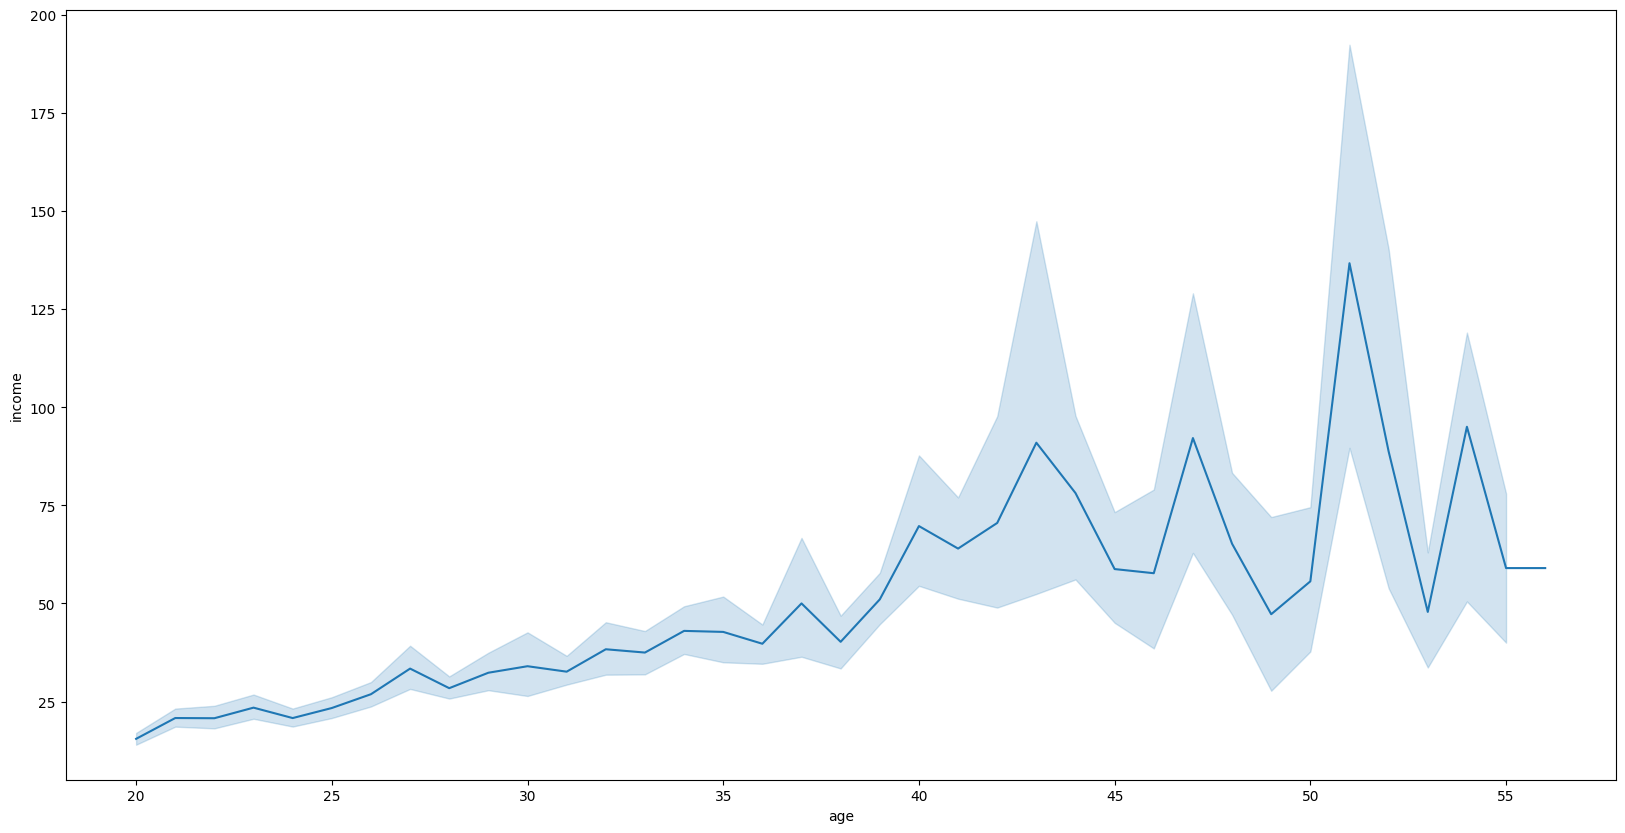

In [8]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = "age", y = "income", data = df, ax = ax)

#Çizim alanı (fig) ve çizim ekseni (ax) oluşturur. 
#figsize=(20,10) ifadesi, oluşturulan çizim alanının boyutlarını belirler. 
#Bu şekilde, grafik çizilecek alan ve eksen hazırlanmış olur.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='age', ylabel='debtinc'>

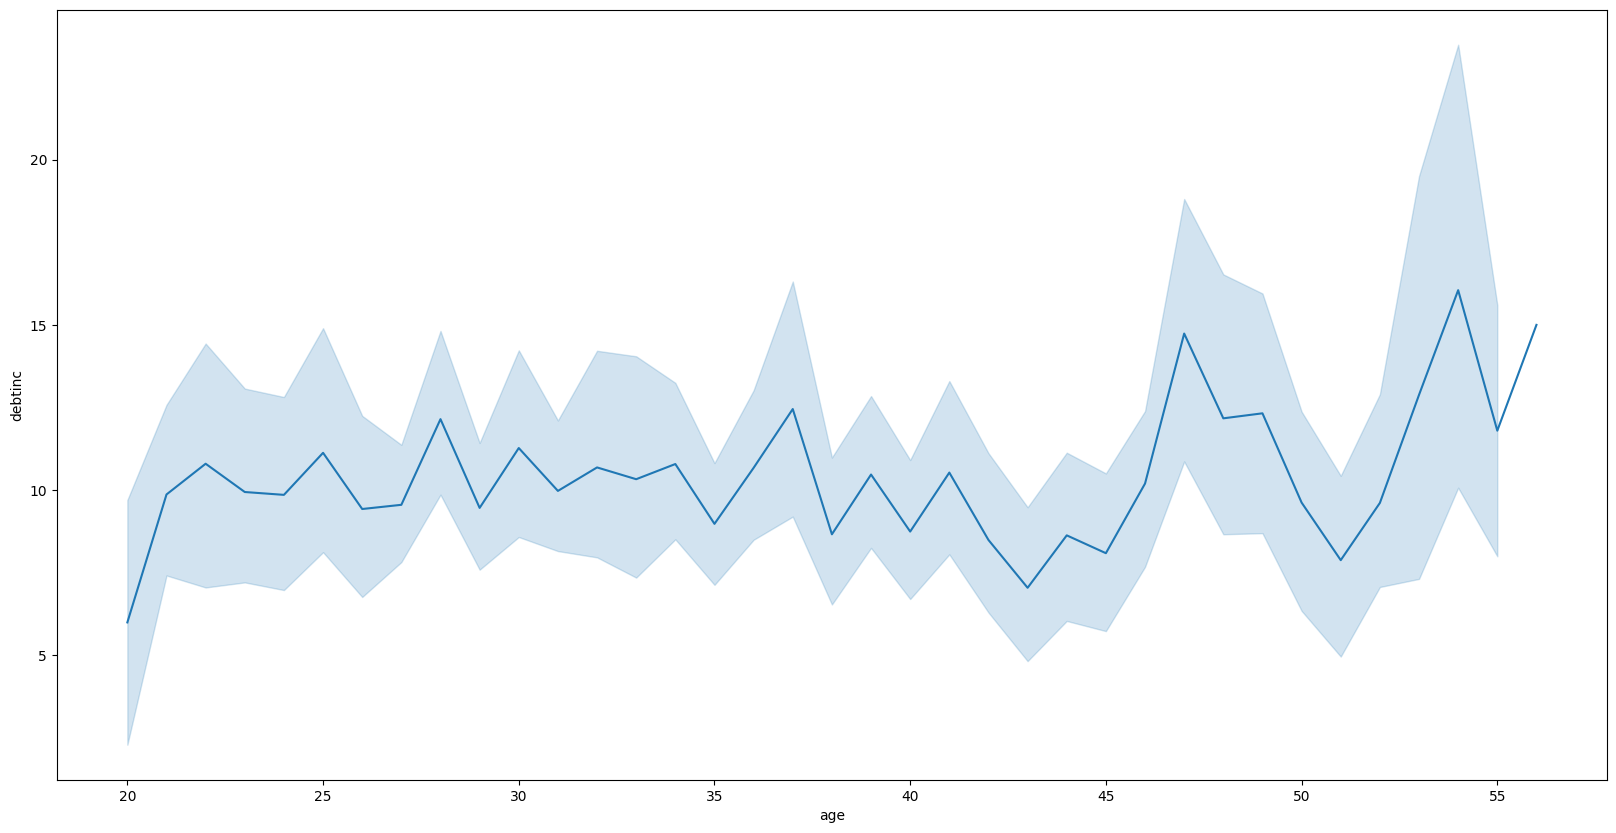

In [9]:
fig, ax = plt.subplots(figsize = (20,10))
sns.lineplot(x = "age", y = "debtinc", data = df, ax = ax)

In [10]:
df["default"].value_counts()

default
0.0    517
1.0    183
Name: count, dtype: int64

In [11]:
X = df.drop(["default"], axis = 1)
y = df["default"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

#random_state, veri setinin rastgele bölünme işleminin her seferinde aynı olmasını sağlar. 
#Bu parametre sayesinde kodu her çalıştırdığınızda X_train, X_test, y_train, ve y_test kümeleri aynı verileri içerecek şekilde oluşturulur. 
#Modeli farklı zamanlarda test ederken tutarlı sonuçlar almaya yardımcı olur. 

In [13]:
sc = StandardScaler() #feature'ların ortalamasını 0 ve standart sapmasını 1 yapar. Bu, özellikler arasındaki farklı ölçekleri normalize eder.
X_train = sc.fit_transform(X_train) #eğitim veri seti X_train üzerinde ölçeklendirme parametrelerini hesaplar ve bu ölçeklemeyi veri setine uygular.
X_test = sc.transform(X_test) #Eğitim setinden öğrenilen parametreleri kullanarak test setini ölçekler.

# **Creating Model**

### Random Forest: Çok sayıda karar ağacının tahminlerini birleştirerek çalışır ve bu sayede tek bir karar ağacına göre daha güvenilir tahminler yapar. Her bir karar ağacı, veri setinin rastgele alt kümelerini kullanarak eğitilir ve bu çeşitlilik, modelin genelleştirme yeteneğini artırır. Bu yöntem hem sınıflandırma hem de regresyon problemleri için kullanılabilir ve aşırı uydurmayı (overfitting) önlemeye yardımcı olur.

In [14]:
rfc = RandomForestClassifier(n_estimators = 200)

In [15]:
rfc.fit(X_train, y_train) #Modelin verilerdeki örüntüleri öğrenmesini ve bu öğrenilen bilgileri yeni verilere uygulayarak tahmin yapabilmesini sağlar.

RandomForestClassifier(n_estimators=200)

In [16]:
rfc.score(X_test, y_test)

0.7857142857142857

In [17]:
rfc_2 = cross_val_score(estimator=rfc, X=X_train, y=y_train, cv=10)
#10 katlı çapraz doğrulama, veri setinin rastgele olarak 10 eşit parçaya böler ve modelin 10 kez test eder. 
#Her bir test sırasında, bir parça test verisi olarak kullanılır ve geri kalan 9 parça eğitim verisi olarak kullanılır. 
#Bu işlem tüm parçalar için tekrarlanır. 
#Modelin her bir parça üzerindeki performansı ölçülür ve bu performanslar ortalama alınarak modelin genel başarımı değerlendirilir.

In [18]:
rfc_2.mean()

0.7910714285714286

### SVM: Destek Vektör Makinesi (SVM), verileri sınıflandırmak için kullanılan bir makine öğrenmesi modelidir. Bu model, farklı sınıfları birbirinden ayırmak için veri noktaları arasında en iyi ayrımı sağlayacak bir veya daha fazla çizgi veya düzlem (hiper düzlem) bulmaya çalışır. Özetle, SVM, verileri sınıflara ayırmak için veri noktaları arasında en uygun sınırı belirler. Bu sınırlar, sınıflar arasında maksimum marjı (en geniş ayrım bölgesi) sağlayacak şekilde seçilir.

In [19]:
sv = SVC()
sv.fit(X_train, y_train)

SVC()

In [20]:
sv.score(X_test, y_test)

0.8071428571428572

In [21]:
#GridSearchCV, tüm bu parametre kombinasyonlarını deneyerek en iyi sonucu veren kombinasyonu seçer. 
model = GridSearchCV(sv, {
    'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0], 
    'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
    'kernel': ['rbf', 'linear']
}, scoring = 'accuracy', cv = 10)

In [22]:
model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.2, 0.4, 0.8, 1.2, 1.8, 4.0, 7.0],
                         'gamma': [0.1, 0.4, 0.8, 1.0, 2.0, 3.0],
                         'kernel': ['rbf', 'linear']},
             scoring='accuracy')

In [23]:
model.best_params_

{'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

In [24]:
model_2 = SVC(C = 0.1, gamma = 0.1, kernel = 'linear')

In [25]:
model_2.fit(X_train, y_train)
model_2.score(X_test, y_test)

0.8357142857142857

In [26]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.8571428571428571

<Axes: >

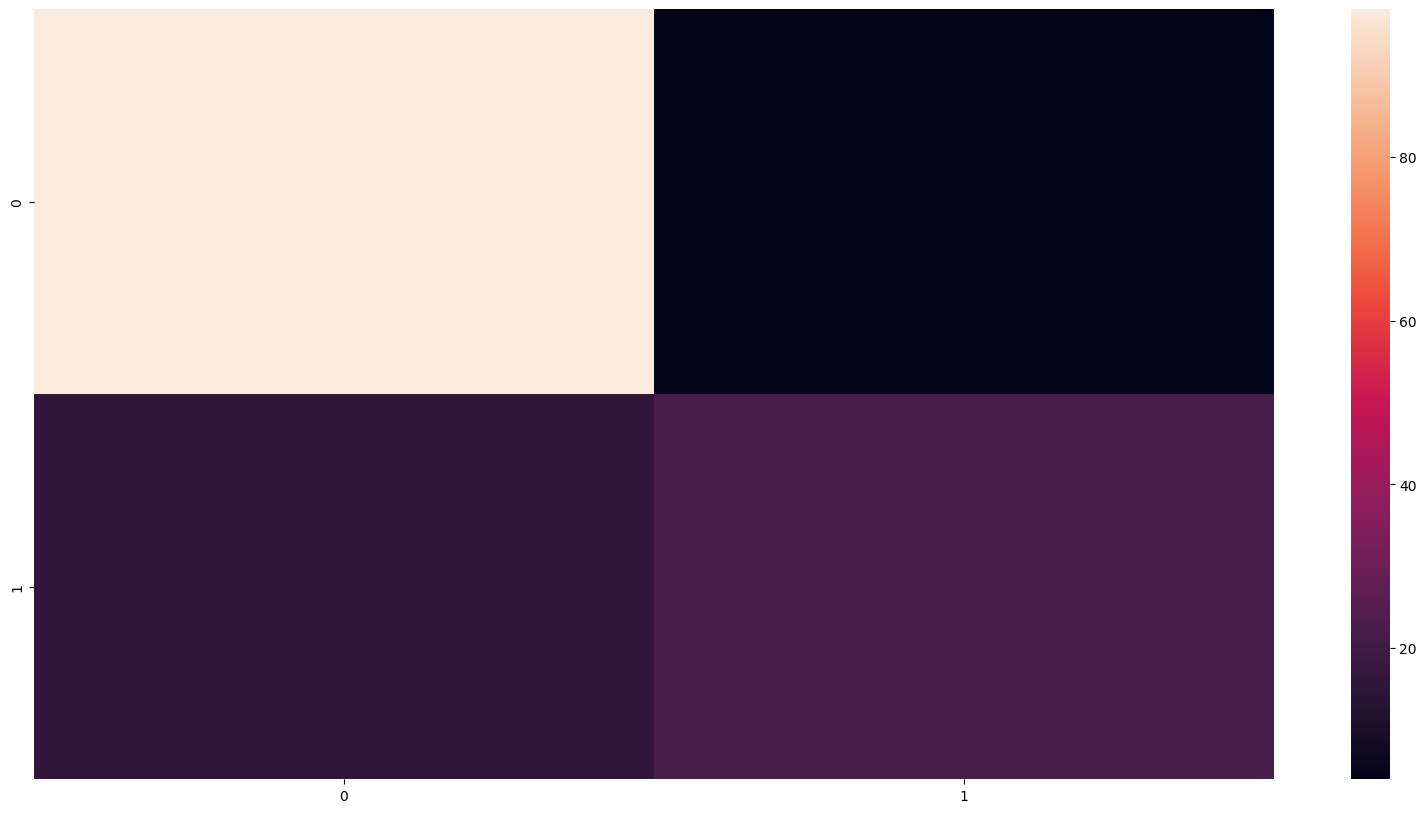

In [27]:
y_pred = lr.predict(X_test)
c = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(c, ax = ax)